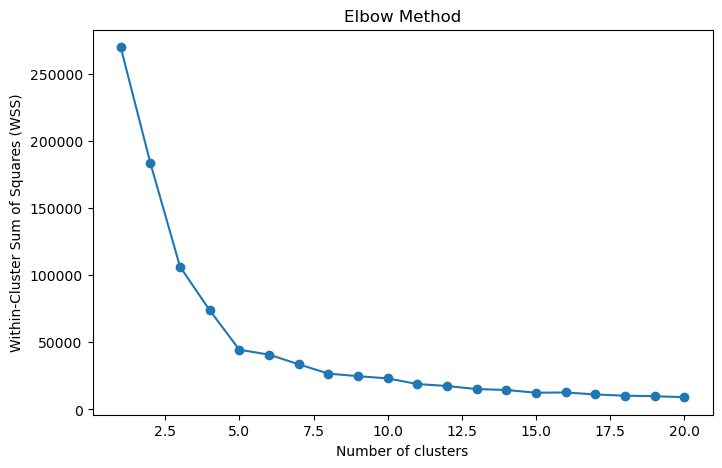

Cluster counts:
cluster_group
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


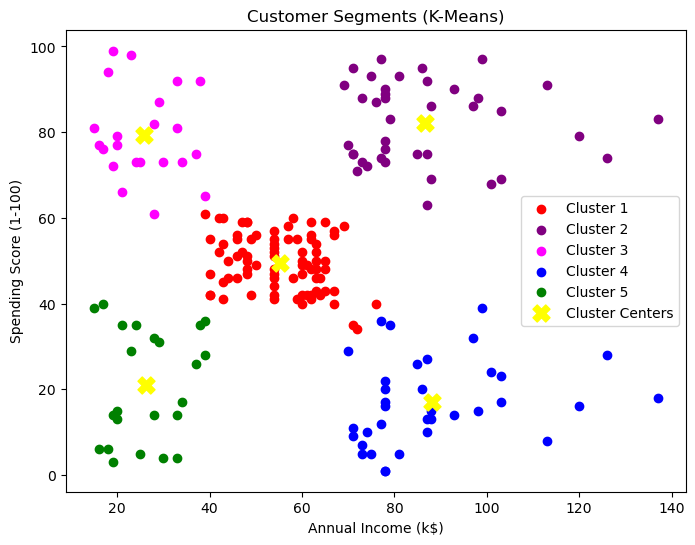

kmeans_clusters.png saved in outputs folder
mall_customers_clustered.csv saved in outputs folder


In [4]:
# Customer Segmentation using K-Means Clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
import os

warnings.filterwarnings('ignore')

# 1. Load Dataset
data = pd.read_csv("Mall_Customers.csv")  # Make sure dataset is in the same folder
df = data[['Annual Income (k$)', 'Spending Score (1-100)']]
x = df.values

# 2. Elbow Method to find optimal clusters
wss = []
for i in range(1, 21):
    k_means = KMeans(n_clusters=i, max_iter=300, random_state=42)
    k_means.fit(df)
    wss.append(k_means.inertia_)

# Plot WSS
plt.figure(figsize=(8,5))
plt.plot(range(1,21), wss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.show()

# 3. Apply K-Means with chosen clusters
# 
kmeans = KMeans(n_clusters=5, max_iter=500, random_state=42)
y_cluster = kmeans.fit_predict(x)

# Assign cluster labels to original data
data['cluster_group'] = y_cluster
print("Cluster counts:")
print(data['cluster_group'].value_counts())

# 4. Visualize Clusters
plt.figure(figsize=(8,6))
colors = ['red', 'purple', 'magenta', 'blue', 'green']

for i in range(5):
    plt.scatter(x[y_cluster == i, 0], x[y_cluster == i, 1], 
                label=f'Cluster {i+1}', c=colors[i])

# Cluster centers
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            label='Cluster Centers', c='yellow', s=150, marker='X')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (K-Means)')
plt.legend()

# 5. Save outputs
# Create outputs folder if it doesn't exist
os.makedirs("outputs", exist_ok=True)

# Save the cluster plot
plt.savefig("outputs/kmeans_clusters.png", dpi=300)

# Display the plot
plt.show()
print("kmeans_clusters.png saved in outputs folder")

# Save the clustered dataset
data.to_csv("outputs/mall_customers_clustered.csv", index=False)
print("mall_customers_clustered.csv saved in outputs folder")